In [112]:
# importing libraries
import pandas as pd

from IPython.display import display
from pathlib import Path
from warnings import simplefilter
simplefilter('ignore')

In [113]:
data_dir = Path("../input/dl-course-data")
red_wine = pd.read_csv(data_dir / "red-wine.csv")
red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [114]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
            layers.Dense(units = 512, activation = 'relu', input_shape = [11]),
            layers.Dense(units = 512, activation = 'relu'),
            layers.Dense(units = 512, activation = 'relu'),
            layers.Dense(units = 1)
])

In [115]:
model.compile(loss = 'mae', optimizer = 'adam')

In [123]:
history = model.fit( X_train, y_train, validation_data = (X_valid, y_valid), batch_size = 256, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0908 - val_loss: 0.1022
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0928 - val_loss: 0.0951
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0904 - val_loss: 0.1056
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0921 - val_loss: 0.0966
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0892 - val_loss: 0.0945
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0889 - val_loss: 0.0984
Epoch 7/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0883 - val_loss: 0.0935
Epoch 8/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0874 - val_loss: 0.0942
Epoch 9/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0874 - val_loss: 0.0928
Epoch 10/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0862 - val_loss: 0.0946
Epoch 11/100
5/5 [=

<Axes: >

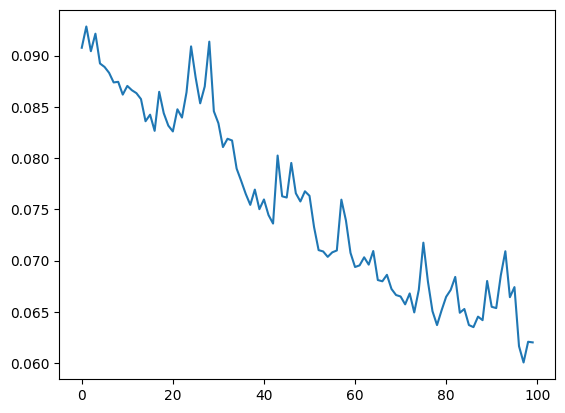

In [124]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()